# We Found Love In A Hopeless Place

## Who Solicits Whom on Craigslist Personals

In [1]:
%matplotlib inline

import pandas as pd
import requests
from bs4 import BeautifulSoup as bs4
import time
import csv
import random
import gmplot
from datetime import datetime
from geopy.geocoders import Nominatim
import os
import glob
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from math import *
from scipy import stats
from datetime import datetime
from scipy.stats import norm
import scipy.stats as stats
import seaborn


from profanity import profanity

headers = {'user-agent' : 'Mozilla/5.0 (Linux; Intel Mac OS X 10_9_5); MY NAME ******@****.com'}

## Series of Helper Functions

In [2]:
def proccess_physical_attributes(physical_attributes):
    attributeList = []
    #Get all of the separate top-level tags
    for attribute in physical_attributes:
        attributeList.append(''.join(attribute.findAll(text=True)))
    return attributeList

In [3]:
#Process the title
def process_title_text(title_text):
    if title_text is None:
        return None
    return title_text.contents[0]


In [15]:
def process_body_text(body_text):
    if body_text is None:
        return None
    return body_text.contents[0][1:]

In [16]:
def process_hometown(hometown):
    if hometown is None:
        return None
    return hometown.contents[0][2:-1]

In [17]:
#Get the relatonship status
def process_relationship_status(relationship_attributes):
    attributeList = []
    #Get all of the separate top-level tags
    for attribute in relationship_attributes:
        attributeList.append(''.join(attribute.findAll(text=True)))
    return attributeList

## Scrape Craigslist to get the list of links

In [18]:
################ Get the List of Links to Search #############################
def getListOfLinks(cityName):
    base_url = 'https://' + cityName + '.craigslist.org/search/m4w'
    rsp = requests.get(base_url, headers=headers)

    html = bs4(rsp.text, 'html.parser')
    #Print out the links
    linkList = []
    for link in html.find_all('a'):
        linkList.append(link.get('href'))

    #List of all
    linksToSearch = []
    for link in linkList:
        #First pass to sanitize the links
        if (len(link) > 2):
            #Way to get HTML sites only!
            if (link.endswith('l')): 
                #Add it to the list
                linksToSearch.append(link)
    return linksToSearch

## Scrape an Individual Link

In [19]:
def scrape_link(cityName, link):
    this_url = 'https://' + cityName + '.craigslist.org/' + link
    response = requests.get(this_url)

    soup = bs4(response.text, 'html.parser')

    #print soup.prettify(encoding='utf-8')

    ### Get the information in the tags ###
    postBody = soup.find("section", {"id": "postingbody"})
    title    = soup.find("span", {"id": "titletextonly"})
    imageLink = soup.find("meta", {"property": "og:image"}) #Check this for ['content'] if not null

    hometown = soup.find("small")

    physical_attributes = soup.find_all("span", {"class":"personals_attrbubble personals_physical"})
    relationship_status = soup.find_all("span", {"class":"personals_attrbubble personals_situational"})

    #Get the time of posting
    datetime = soup.find("time", {"class":"timeago"})
    if datetime is not None:
        datetime = datetime.contents
    
    #Sketchy regex way to find the age, since it doesn't fall neatly in the directory structure
    agePointer = soup.text.find("age:")    
    age = ""
    #Fetch the age if it is not null
    if agePointer != -1:
        age = soup.text[agePointer + len("age: "): agePointer + 7]

    ################################################
    # Formatting witchcraft!
    ################################################
    #Print the title text
    formatted_title = process_title_text(title)
    #Print off the age
    formatted_age = age
    #Print off the body of the text
    formatted_body = process_body_text(postBody)
    #Print off the hometown
    formatted_hometown = process_hometown(hometown)
    #Print off the relationship status
    if relationship_status != None:
        formatted_relationship = process_relationship_status(relationship_status)
    else:
        formatted_relationship = None
    #Print off the physical attributes
    if physical_attributes != None:
        formatted_physical = proccess_physical_attributes(physical_attributes)
    else:
        formatted_physical = None
        
        
    my_dict = {
        "title": formatted_title,
        "body" : formatted_body,
        "time" : datetime,
        "age"  : formatted_age,
        "hometown": formatted_hometown,
        "relationship": formatted_relationship,
        "physical" : formatted_physical
    }
    
    return my_dict

In [8]:
#Pseudo Main Function
#This picks a directory to save things to
def scrapeCity(cityName, region):
    dictData = []
    links = getListOfLinks(cityName)
    print len(links)
    for link in links[::2]:
        formattedData = scrape_link(cityName, link)
        dictData.append(formattedData)
        sleeptime = random.random() + 1.0
        time.sleep(sleeptime)
        
    pandasObject = pd.DataFrame(dictData)
    
    savedName = cityName + ".pkl"
    directory = '/home/bread/424/Craigslist/m4w/' + region
    os.chdir(directory)
    pandasObject.to_pickle(savedName)

In [27]:
pandasObject = pd.DataFrame(dictData)
#Let's instead try just working with pickles?
pandasObject.to_pickle("m4mCNJ.pkl")

NameError: name 'dictData' is not defined

## Let's try a map!

In [28]:
gmap = gmplot.GoogleMapPlotter.from_geocode("New Jersey")

geolocator = Nominatim()


latList = []
longList = []
location = geolocator.geocode("Somerset, NJ)")
latList.append(location.latitude)
longList.append(location.longitude)
print coordinateList

gmap.marker(latList[0], longList[0], '#3B0B39')
gmap.draw("mymap.html")

NameError: name 'coordinateList' is not defined

### To do: Get list of locations from https://www.craigslist.org/about/sites

In [10]:
masterSites = 'https://www.craigslist.org/about/sites'
rsp = requests.get(masterSites, headers=headers)
html = bs4(rsp.text, 'html.parser')

linkList = []
for link in html.find_all('a'):
        print link
        linkList.append(link.get('href'))
print linkList
print len(linkList)

<a href="#US">US</a>
<a href="#CA">Canada</a>
<a href="#EU">Europe</a>
<a href="#ASIA">Asia/Pacific/Middle East</a>
<a href="#OCEANIA">Oceania</a>
<a href="#LATAM">Latin America</a>
<a href="#AF">Africa</a>
<a name="US"></a>
<a href="//auburn.craigslist.org/">auburn</a>
<a href="//bham.craigslist.org/">birmingham</a>
<a href="//dothan.craigslist.org/">dothan</a>
<a href="//shoals.craigslist.org/">florence / muscle shoals</a>
<a href="//gadsden.craigslist.org/">gadsden-anniston</a>
<a href="//huntsville.craigslist.org/">huntsville / decatur</a>
<a href="//mobile.craigslist.org/">mobile</a>
<a href="//montgomery.craigslist.org/">montgomery</a>
<a href="//tuscaloosa.craigslist.org/">tuscaloosa</a>
<a href="//anchorage.craigslist.org/">anchorage / mat-su</a>
<a href="//fairbanks.craigslist.org/">fairbanks</a>
<a href="//kenai.craigslist.org/">kenai peninsula</a>
<a href="//juneau.craigslist.org/">southeast alaska</a>
<a href="//flagstaff.craigslist.org/">flagstaff / sedona</a>
<a href="//m

In [2]:
#TO-DO: Re-do the locations that failed!

#10 South, 10 Midwest, 10 West, 10 East
SOUTH_LIST = [ #Not done for M4M
    #South
    'auburn',
    'littlerock',
    'treasure',
    'jackson',
    'chattanooga',
    'tricities',
    'columbia',
    'neworleans',
    'atlanta',
    'raleigh']
MIDWEST_LIST = [
    #Midwest
    'chicago',
    'peoria',
    'lincoln',
    'stlouis',
    'madison',
    'indianapolis',
    'bloomington',
    'siouxcity',
    'lawrence',
    'springfield',
    'cincinnati'
    ]
WEST_LIST = [
    'stockton',
    'orangecounty',
    'sandiego', #Didn't work!
    'losangeles', #Didn't work!
    'sfbay', #Didn't work!
    'portland',
    'seattle', #Didn't work!
    'saltlakecity',
    'albuquerque',
    'lasvegas'
    ]
#EAST_LIST DONE!
EAST_LIST = [
    'cnj',
    'providence',
    'newhaven',
    'philadelphia',
    'vermont',
    'baltimore',
    'boston', #Didn't work!
    'delaware',
    'newyork',
    'maine'
]
populationList = [
    603500, 652000, 1356000, 3114000, 837500, 3884000, 610000, 300000, 560000, 200000,
    100000, 116000, 164122, 90000, 2811600, 300000, 100000, 2000000, 320000, 650000, 9730000,
    730000, 560000, 810000, 151000, 1337000, 580000, 1300000, 5000000, 5614000, 100000,
    645000, 8406000, 1330000, 130660, 935000, 3535000, 622104, 6236562, 178000, 1553000
]

# THE BIG MAIN FUNCTION!

In [12]:
for city in EAST_LIST:
    print "Scraping " + city
    scrapeCity(city, "EAST")

Scraping cnj
200
Scraping providence
200
Scraping newhaven
200
Scraping philadelphia
200
Scraping vermont
201
Scraping baltimore
201
Scraping boston
200
Scraping delaware
200
Scraping newyork
200
Scraping maine
200


## Testing the Pickles

In [42]:
df = pd.read_pickle('baltimore.pkl')

print df['age'].convert_objects(convert_numeric=True).mean()
print df['age'].convert_objects(convert_numeric=True).std()

39.9638554217
12.064305124


## Turning the dataframes into Lists!

In [6]:
meanList = []
stdList = []
nameList = []
bodyList = []
titleList = []

#Assumes Directory has already been set
def addFromDirectory():
    for pickle in glob.glob("*.pkl"):
        #Add the city name to the list
        nameList.append(str(pickle).split('.')[0])
        df = pd.read_pickle(pickle)
        meanList.append(df['age'].convert_objects(convert_numeric=True).mean())
        stdList.append(df['age'].convert_objects(convert_numeric=True).std())
        bodyList.append(df['body'].dropna())
        titleList.append(df['title'].dropna())

os.chdir('/home/bread/424/Craigslist/m4w/EAST')
addFromDirectory()

os.chdir('/home/bread/424/Craigslist/m4w/MIDWEST')
addFromDirectory()  

os.chdir('/home/bread/424/Craigslist/m4w/SOUTH')
addFromDirectory()

os.chdir('/home/bread/424/Craigslist/m4w/WEST')
addFromDirectory()

## Making the plot

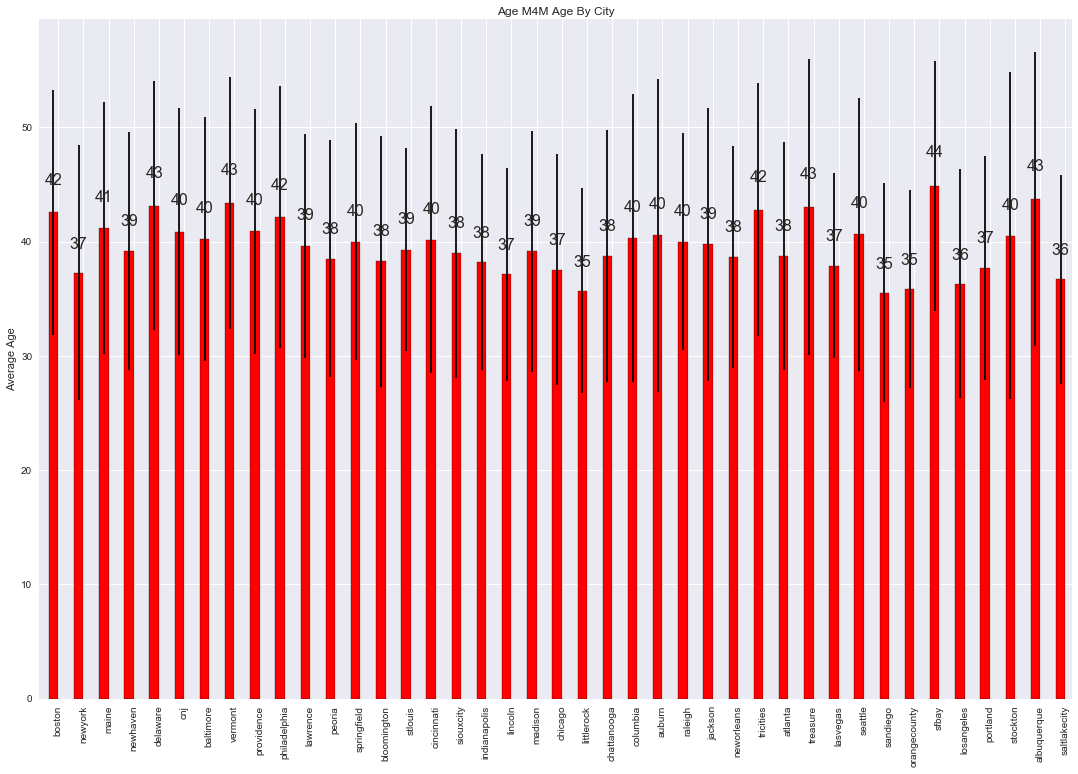

In [7]:


ind = np.arange(1.5, len(nameList) * 4, 4)
fig, ax = plt.subplots()
width = 1.5
rects = ax.bar(ind, meanList, width, color='r', yerr=stdList)
matplotlib.rcParams.update({'font.size': 16})

ax.set_ylabel("Average Age")
ax.set_title("Age M4M Age By City")
#ax.set_xticks(ind + width)
#ax.set_xticklabels(nameList)
plt.xticks(ind+width, nameList, rotation='vertical')
plt.xlim([0, len(nameList) * 4])

def autolabel(rectangles):
    for rectangle in rectangles:
        height = rectangle.get_height()
        ax.text(rectangle.get_x() + rectangle.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')      

autolabel(rects)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 12.5)
fig.savefig('test2png.png', dpi=100)
plt.show()

39.6628549442
10.6955262713


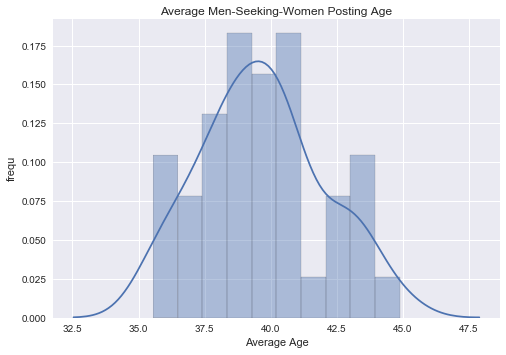

In [22]:
ax = seaborn.distplot(meanList, bins = 10)
plt.xlabel('Average Age')
plt.ylabel('frequ')
plt.title('Average Men-Seeking-Women Posting Age')
print reduce(lambda x, y: x + y, meanList) / len(meanList)
print reduce(lambda x, y: x + y, stdList) / len(stdList)

## Let's Try doing this all through Pandas!

## Running Normality Test on Age!

In [9]:

k2, p = stats.normaltest(meanList)

print p

0.687220919903


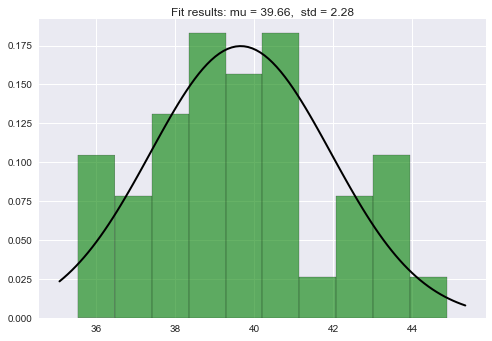

In [10]:


mu, std = norm.fit(meanList)

plt.hist(meanList, bins=10, normed=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

## Text generation (Using Markov Chains)

In [29]:
import markovify

def unifyBodies():
    text = ''
    for city in bodyList:
        for entry in city:
            text += entry
    return text

text = unifyBodies()
generator = markovify.Text(text)


If your interested send a pic if you can.
I am generally a little about me please don't waste my time off to a a business, so I don't want to share a guy.
You are height and weight proportionate,, someone who wants date, & who is looking to try here first.
Am open to anything further.
So this should be too.
*****************************
I have my own things.
Please have a child.
I like to hook up or FWB.


In [58]:

for i in range(5):
    print generator.make_sentence()
print "*****************************"
for i in range(3):
    print(generator.make_short_sentence(160))


My mother let him take me with the flow.
I'm looking for a woman who would like to conversate any go out to dinner and a t-shirt type..
If we tried this before with success.
First of all, I want to be changed or the guy from Canada 6 foot tall blue eyes thin build straight white teeth blue eyes and 188 pds thanx,,, sickszearowonseavanwunateto The first pic does NOT necessarily have to have fun, i have to, first i most say i am a 31 year old DWM is looking to change your life to the area I will then pull down your spine to your edge.
Please email with your honey-do lists.
*****************************
So I know you are single, married, other, any age and race don't matter to me.
I also wanna say that I know you can.
I am interested in talking or meeting send pic and lets make it on me.


## And God Said, Let There Be A Word Cloud

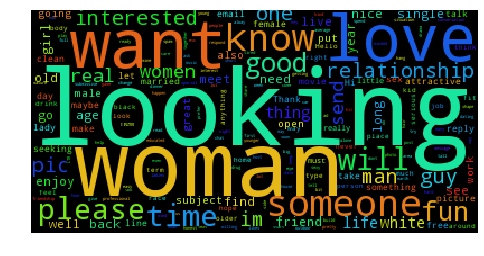

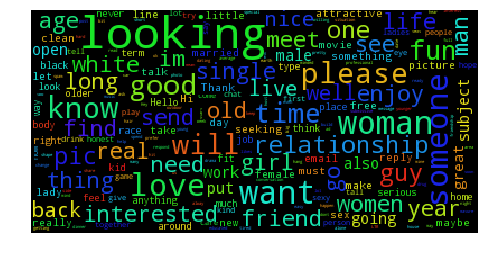

In [27]:
def generateWordCloud(text):

    from wordcloud import WordCloud

    wordcloud = WordCloud().generate(text)

    import matplotlib.pyplot as plt
    plt.imshow(wordcloud)
    plt.axis("off")

    # take relative word frequencies into account, lower max_font_size
    wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
generateWordCloud(text)

## Let's get the stats on this!

In [28]:
from textstat.textstat import textstat

score = textstat.smog_index(text)

print "Craigslist posts are written at a grade %d level" % score
    

Craigslist posts are written at a grade 3 level


# Let's compare M4M to M4W!

In [2]:
os.chdir('/home/bread/424/Craigslist/m4w/WEST')
westM4W = []
westM4M = []
nameList = [] #Labels for the region names

westList = []
midwestList = []
eastList = []
southList = []
#Get West
for pickle in glob.glob("*.pkl"):
    nameList.append(str(pickle).split('.')[0])
    westM4W.append(pd.read_pickle(pickle))
    westList.append(pd.read_pickle(pickle))
        
#Get Midwest
os.chdir('/home/bread/424/Craigslist/m4w/MIDWEST')
for pickle in glob.glob("*.pkl"):
    nameList.append(str(pickle).split('.')[0])
    westM4W.append(pd.read_pickle(pickle))
    midwestList.append(pd.read_pickle(pickle))
#Get South
os.chdir('/home/bread/424/Craigslist/m4w/SOUTH')
for pickle in glob.glob("*.pkl"):
    nameList.append(str(pickle).split('.')[0])
    westM4W.append(pd.read_pickle(pickle))   
    southList.append(pd.read_pickle(pickle))
#Get the East
os.chdir('/home/bread/424/Craigslist/m4m/EAST')
for pickle in glob.glob("*.pkl"):
    nameList.append(str(pickle).split('.')[0])
    westM4W.append(pd.read_pickle(pickle))
    eastList.append(pd.read_pickle(pickle))


In [4]:
def bodyTextForRegion(region):
    allText = ''
    for city in region:
        allText += ''.join(entry for entry in city['body'].dropna())
    return allTextscat

In [4]:
#Compare the average ages
meanPairs = []
def addToMeanPairs(region):
    for i in range(len(region)):
        meanPairs.append(((region[i]['age'].convert_objects(convert_numeric=True).mean()),
                         (region[i]['age'].convert_objects(convert_numeric=True).mean())))
addToMeanPairs(westList)
addToMeanPairs(eastList)
addToMeanPairs(midwestList)
addToMeanPairs(southList)


width: 0.108536585366


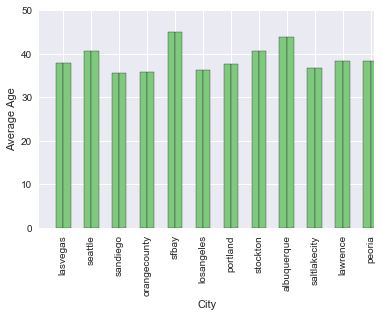

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import operator as o

import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)

space = 0.3

indices = len(nameList) * 2 #Two bars per index

width = (1 - space) / indices + 0.1
print "width:", width

pos = 0.25
indexList = [] #X-cooridnates of the centers of the graphs
for city in meanPairs:
    ax.bar(pos, city[0], width, color= cm.Accent(1.0 / indices))
    pos += width
    indexList.append(pos)
    ax.bar(pos, city[1], width, color= cm.Accent(3.0 / indices))
    pos += (width + 0.2)
    
#Set the axes!    
ax.set_xticks(indexList)
ax.set_xticklabels(nameList)
ax.set_xlabel("City")
ax.set_ylabel("Average Age")
ax.set_ylim([0,50])

#Add the legend
firstPatch = mpatches.Patch(color=cm.Accent(1.0 / indices), label='M4M')
secondPatch = mpatches.Patch(color=cm.Accent(2.0 / indices), label='M4W')


#Assign the city ticks!
plt.setp(plt.xticks()[1], rotation=90)

#Trim the plot
plt.xlim(0, 5)

plt.show()


## Tabling this for now. Let's instead look at the writing level!

In [5]:
from textstat.textstat import textstat
M4Wtext = ''
for i in range(len(westM4W)):
    cityFullText = ''.join(entry for entry in westM4W[0]['body'].dropna())
    M4Wtext += cityFullText

    score = textstat.smog_index(M4Wtext)

allEastText = ''
for i in range(len(eastList)):
    eastList = ''.join(entry for entry in westM4W[0]['body'].dropna())
    allEastText += cityFullText

    score = textstat.smog_index(M4Wtext)

print "M4W Craigslist posts are written at a grade %d level" % score


M4W Craigslist posts are written at a grade 3 level


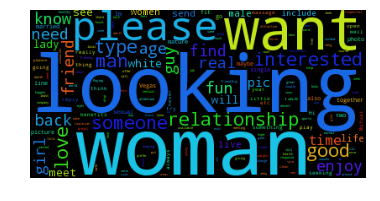

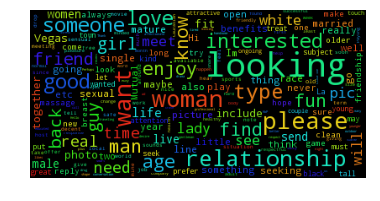

In [9]:
#Test on east text
generateWordCloud(allEastText)

## Check the rate of profanity! 

In [5]:
textData = []
swearsByCity = []
cleanByCity = []
swearRate = []

for city in westM4W:
    textData.append(city['body'].dropna())

    
for i in range(len(westM4W)):
    queryCity = textData[i]
    swearList = []
    cleanList  = []
    for post in queryCity:
        if profanity.contains_profanity(post):
            swearList.append(post)
        else:
            cleanList.append(post)
    swearsByCity.append(swearList)
    cleanByCity.append(cleanList)
    swearRate.append((len(swearList) / 100.0))
            
        
def getSwearRate(cityDF):
    text = cityDF['body'].dropna()
    swearCount = 0.0
    cleanCount = 0.0
    for post in text:
        if profanity.contains_profanity(post):
            swearCount += 1
        else:
            cleanCount += 1
    return swearCount / (swearCount + cleanCount)
        


## Plotting profanity rate!

['lasvegas', 'seattle', 'sandiego', 'orangecounty', 'sfbay', 'losangeles', 'portland', 'stockton', 'albuquerque', 'saltlakecity', 'lawrence', 'peoria', 'springfield', 'bloomington', 'stlouis', 'cincinnati', 'siouxcity', 'indianapolis']
width: 0.138888888889


NameError: global name 'mpatches' is not defined

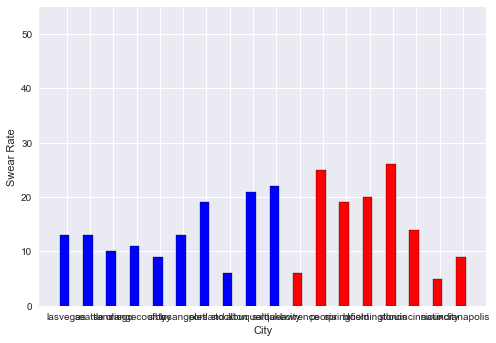

In [6]:
def graphProfanity():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    print nameList

    space = 0.3

    indices = len(nameList)

    width = (1 - space) / indices + 0.1
    print "width:", width

    pos = 0.25
    indexList = [] #X-cooridnates of the centers of the graphs
    colorVal = 'b'
    count = 1
    for rate in swearRate:
        ax.bar(pos, rate * 100, width, color=colorVal)
        indexList.append(pos + 0.1)
        pos += width + 0.2
        count += 1
        if (count > 10):
            colorVal = 'r'
        if (count > 22):
            colorVal = 'g'
        if (count > 32):
            colorVal = 'maroon'

    #Set the axes!    
    ax.set_xticks(indexList)
    ax.set_xticklabels(nameList)
    ax.set_xlabel("City")
    ax.set_ylabel("Swear Rate")
    ax.set_ylim([0,55])

    #Add the legend
    firstPatch = mpatches.Patch(color=cm.Accent(5.0 / indices), label='M4M')


    #Assign the city ticks!
    plt.setp(plt.xticks()[1], rotation=90)

    #Trim the plot
    plt.xlim(0, 14)

    plt.show()

graphProfanity()

## Let's do some comparison to the Web and Chat Text!

In [6]:
from nltk.corpus import nps_chat
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

#Filter out the stopwords
def getChatroomData():  
    fullChatText = ''
    for chatroom in nps_chat.posts():
        for message in chatroom:
            fullChatText += (message + " ")
    return fullChatText


corpusText = getChatroomData()
#Filter the stopwords again

corpusTokenized = word_tokenize(corpusText)
fullTextTokenized = word_tokenize(cityFullText)



In [7]:
corpusFreqDist = FreqDist(corpusTokenized)
fullTextFreqDist = FreqDist(fullTextTokenized)


In [ ]:
uniquenessList = []
#Iterate through the list
for word in fullTextFreqDist:
    corpusOccurances  = corpusFreqDist[word]
    cragslistOccurances = fullTextFreqDist[word]
    if corpusOccurances > 4 and cragslistOccurances > 4:
        uniquenessList.append((word, log10(float(cragslistOccurances) / float(corpusOccurances))))

In [ ]:
uniquenessList.sort(key=lambda tup: tup[1])

print uniquenessList

## TO-DO Options!

* Compare Region to Region for swearing and stuff
* Compare age or some other demographic info to swearing or language use


###  Looking at age versus swearing!

In [6]:
 def getAgeSwearPair(region):
    ageSwearPair = []
    for df in region:
        averageAge = (df['age'].convert_objects(convert_numeric=True).mean())
        swearingRate = getSwearRate(df)
        ageSwearPair.append((averageAge, swearingRate))
    return ageSwearPair

In [7]:
west = getAgeSwearPair(westList)
east = getAgeSwearPair(eastList)
south = getAgeSwearPair(southList)
midwest = getAgeSwearPair(midwestList)

In [8]:
## Make a dataframe for graphing
dfWest = pd.DataFrame(west)
dfWest.columns = ['Age', 'SwearRate']
dfWest['Region'] = 'West'
print dfWest
dfEast = pd.DataFrame(east)
dfEast.columns = ['Age', 'SwearRate']
dfEast['Region'] = 'East'

dfMidwest = pd.DataFrame(midwest)
dfMidwest.columns = ['Age', 'SwearRate']
dfMidwest['Region'] = 'Midwest'

dfSouth = pd.DataFrame(south)
dfSouth.columns = ['Age', 'SwearRate']
dfSouth['Region'] = 'South'

dfAll = dfWest.append(dfEast).append(dfMidwest).append(dfSouth)
print dfAll

         Age  SwearRate Region
0  37.884615       0.13   West
1  40.647887       0.13   West
2  35.550725       0.10   West
3  35.869565       0.11   West
4  44.876712       0.09   West
5  36.343284       0.13   West
6  37.726027       0.19   West
7  40.532258       0.06   West
8  43.750000       0.21   West
9  36.714286       0.22   West
          Age  SwearRate   Region
0   37.884615   0.130000     West
1   40.647887   0.130000     West
2   35.550725   0.100000     West
3   35.869565   0.110000     West
4   44.876712   0.090000     West
5   36.343284   0.130000     West
6   37.726027   0.190000     West
7   40.532258   0.060000     West
8   43.750000   0.210000     West
9   36.714286   0.220000     West
0   38.425287   0.393939     East
1   38.279070   0.267857     East
2   47.763889   0.540000     East
3   37.000000   0.410000     East
4   40.650602   0.480000     East
5   44.259740   0.420000     East
6   39.963855   0.450000     East
7   48.447761   0.320000     East
8   39.146667

## And let's graph it using Seaborn! 

Text(0.5,1,u'Swear Rate By Region')

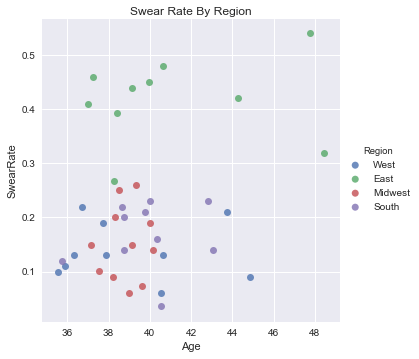

In [16]:
#g = seaborn.pairplot(dfAll, hue='Region', kind='scatter')

ax = seaborn.lmplot('Age', 'SwearRate', data=dfAll, fit_reg=False, hue='Region', size=5)

plt.title('Swear Rate By Region')

In [6]:
#Size based on population
#Color based on region
print len(ageSwearPair)
ageList = [s[0] for s in ageSwearPair]
swearList = [s[1] for s in ageSwearPair]
colors = [] #List for coloring the cities correctly
for i in range(42):
    if (i < 10):
        colors.append('r')
    elif (i < 22):
        colors.append('g')
    elif (i < 32):
        colors.append('maroon')
    else:
        colors.append('royalblue')

fig = plt.figure()
ax = fig.add_subplot(111)        
plt.scatter(ageList, swearList, c=colors, s=75.5)
ax.set_xlabel("Average Age")
ax.set_ylabel("Swear Rate")
#plt.plot(ageList, np.poly1d(np.polyfit(ageList, swearList, 1))(ageList))

gradient, intercept, r_value, p_value, std_err = stats.linregress(ageList,swearList)
print "R^2 value is : %f" % (r_value * r_value)

NameError: name 'ageSwearPair' is not defined

## More research questions!
* Relationship between time of day and swearing rate
* Relationship between time of day and age
* Most common words by region! 
    * Like the "Most Craigslist-y words" except comparing cities against each other

# Aggregate the text by region!

In [10]:
eastText = word_tokenize(bodyTextForRegion(eastList))
westText = word_tokenize(bodyTextForRegion(westList))
midwestText = word_tokenize(bodyTextForRegion(midwestList))
southText = word_tokenize(bodyTextForRegion(southList))

In [11]:
eastFreqDist = FreqDist(eastText)
westFreqDist = FreqDist(westText)
midwestFreqDist = FreqDist(midwestText)
southFreqDist   = FreqDist(southText)

In [12]:
def compareRegions(queryFreqDist, comparisonFreqDist):
    uniquenessList = []
    #Iterate through the list
    for word in queryFreqDist:
        compareOccurances  = comparisonFreqDist[word]
        queryOccurances = queryFreqDist[word]
        if compareOccurances > 4 and queryOccurances > 4:
            uniquenessList.append((word, log10(float(queryOccurances) / float(compareOccurances))))

    uniquenessList.sort(key=lambda tup: tup[1])

    print uniquenessList[-10:]

In [13]:
print "EAST VS REST"
compareRegions(eastFreqDist, FreqDist(westText + midwestText + southText))
print "WEST VS REST"
compareRegions(westFreqDist, FreqDist(eastText + midwestText + southText))
print "SOUTH VS REST"
compareRegions(southFreqDist, FreqDist(westText + midwestText + eastText))
print "MIDWEST VS REST"
compareRegions(midwestFreqDist, FreqDist(westText + eastText + southText))

EAST VS REST
[(u'ass', 0.6728672017718137), (u'bi', 0.7647872888256622), (u'horny', 0.7939455175668755), (u'tight', 0.8239087409443188), (u'sucked', 0.8750612633917001), (u'sucking', 0.9461246192171454), (u'stats', 0.9572480195790501), (u'cock', 1.2452222669461557), (u'bottom', 1.3256524705723132), (u'suck', 1.4722687519252504)]
WEST VS REST
[(u'hello', 0.15490195998574316), (u'committed', 0.15970084286751188), (u'y', 0.15970084286751188), (u'Hispanic', 0.19188552623891314), (u'de', 0.1962946451439682), (u'east', 0.20411998265592482), (u'including', 0.20411998265592482), (u'una', 0.20411998265592482), (u'boating', 0.25527250510330607), (u'HAVE', 0.38021124171160603)]
SOUTH VS REST
[(u'church', 0.3010299956639812), (u'Spanish', 0.3010299956639812), (u'thru', 0.3010299956639812), (u'satisfy', 0.3424226808222063), (u'God', 0.3424226808222063), (u'reality', 0.36797678529459443), (u'relocate', 0.36797678529459443), (u'Even', 0.38021124171160603), (u'sees', 0.38021124171160603), (u'Beach', 0

# Time of Day Vs. Swearing!

Here's the plan. I will get a massive list of (time, body) tuples.
So I don't have to do more work later, I'll get them by region first and then just jam them all together for my inference later. In terms of graphing, I think this will work best by binning based on the time of day. This isn't going to work very well in the most populated postings, since they'll all be at basically the same time. 

In [14]:
#Returns a list of all cities in the region. Each element is a list of time body 
#postings for the city
def timeBodyByRegion(region):
    regionTimeBodyList = []
    for city in region:
        cityTimeBodyList = []
        timeList = city['time']
        bodyList = city['body']
        for i in range(len(timeList)):
            if timeList[i] is not None and bodyList[i] is not None:
                timeOfPost = ''.join(timeList[i]).split(' ')[-1]
                textOfPost = bodyList[i]
                cityTimeBodyList.append((timeOfPost, textOfPost))
        regionTimeBodyList.append(cityTimeBodyList)
    return regionTimeBodyList
    
    
        
eastTimeBody = timeBodyByRegion(eastList)
westTimeBody = timeBodyByRegion(westList)
midwestTimeBody = timeBodyByRegion(midwestList)
southTimeBody = timeBodyByRegion(southList)


In [ ]:
# Pairwise (Time, Swore) where time is a datetime and swore is a boolean

In [15]:
#Returns a pair (timeList, swearList) for the region
def getTimeSwearPairs(regionTimeBody):
    timeList = []
    swearList = []
    for city in regionTimeBody:
        for post in city:
            datetimePost = datetime.strptime(post[0], '%I:%M%p').time()
            timeList.append(datetimePost)
            swearList.append(profanity.contains_profanity(post[1]))
    return (timeList, swearList)

eastTimeSwearPairs    = getTimeSwearPairs(eastTimeBody)
westTimeSwearPairs    = getTimeSwearPairs(westTimeBody)
midwestTimeSwearPairs = getTimeSwearPairs(midwestTimeBody)
southTimeSwearPairs   = getTimeSwearPairs(southTimeBody)
        
#Checking
print eastTimeSwearPairs[0][6]

00:45:00


## Next steps: Bin the times and then plot!

http://stackoverflow.com/questions/1574088/plotting-time-in-python-with-matplotlib

Huh, this probably would've been easier to just use a Seaborn Histogram!

In [16]:
trueTimes = []
falseTimes = []

def plotTimeSwearByRegion(regionTimeSwearPairs):
    #Sort based on the time
    sortedTimes = []
    for i in range(len(regionTimeSwearPairs[0])):
        sortedTimes.append((regionTimeSwearPairs[0][i], regionTimeSwearPairs[1][i]))
    sortedTimes = sorted(sortedTimes, key = lambda tup: tup[0])
    
    return sortedTimes

def getSwearRateByHour(regionTimeList):
    currentHour = 0
    trueCount   = 0
    falseCount  = 0
    swearRateByHour = []
    for pair in regionTimeList:
        hour = pair[0].hour
        if (hour != currentHour):
            swearRateByHour.append(float(trueCount) / (float(trueCount + falseCount)))
            trueCount = 0
            falseCount = 1
            currentHour += 1
        #In either case, count this incident
        if pair[1] is True:
            trueCount += 1
        else:
            falseCount += 1

    #Last one
    swearRateByHour.append(float(trueCount) / (float(trueCount + falseCount)))
    return swearRateByHour




In [17]:
eastTimes = getSwearRateByHour(plotTimeSwearByRegion(eastTimeSwearPairs))
westTimes = getSwearRateByHour(plotTimeSwearByRegion(westTimeSwearPairs))
midwestTimes = getSwearRateByHour(plotTimeSwearByRegion(midwestTimeSwearPairs))
southTimes = getSwearRateByHour(plotTimeSwearByRegion(southTimeSwearPairs))

allTimes = [(x + y + z + q) / 4.0 for x, y, z, q in zip(eastTimes, westTimes, midwestTimes, southTimes)]

In [18]:
#Plotting
from pandas import DataFrame
seaborn.set_style("whitegrid")
timeList = ['12:00am', '1:00am', '2:00am', '3:00am', '4:00am', '5:00am', '6:00am', '7:00am',
            '8:00am', '9:00am', '10:00am', '11:00am', '12:00am', '1:00pm', '2:00pm', '3:00pm', 
            '4:00pm', '5:00pm', '6:00pm', '7:00pm', '8:00pm', '9:00pm', '10:00pm', '11:00pm']
def plotSwearRates(swearRateByHour):
    df = DataFrame(swearRateByHour)
    df.columns = ['Swear Rate']
    df['Time'] = timeList


    #seaborn.set_style("darkgrid")

    #with matplotlib.style.context('ggplot'):
    ax = seaborn.barplot(x='Time', y='Swear Rate', data=df, ci=None)
    plt.style.use('fivethirtyeight')
    ax.xaxis.labelpad = 50
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.ylabel('Average Swear Rate')
    plt.title('Swear Rate By Time of Day')

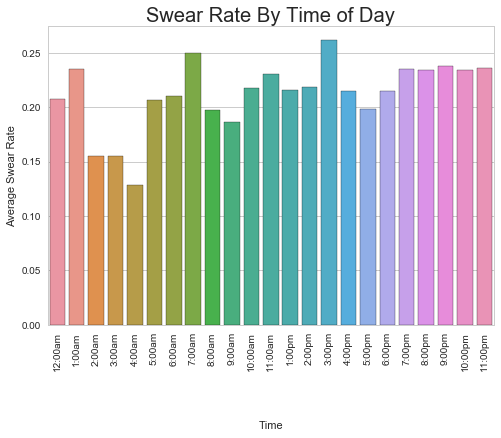

In [19]:
#plotSwearRates(eastTimes)
#plotSwearRates(westTimes)
#plotSwearRates(midwestTimes)
#plotSwearRates(southTimes)
plotSwearRates(allTimes)

In [25]:
print matplotlib.__version__
print plt.style.available

2.0.0b3+1859.g80a3f3e
[u'seaborn-darkgrid', u'seaborn-notebook', u'seaborn-muted', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'classic', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']
